<a href="https://colab.research.google.com/github/Ankushsaini90/Banglore_house_price_predction/blob/main/Banglore_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Basic Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
#  matplotlib.rcParams["figure.figsize"] = (20,10)

In [ ]:
# importing data set
data = pd.read_csv("/content/Bengaluru_House_Data.csv")

In [ ]:
df = data.copy()

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
# columns
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [ ]:
# Size of dataset
print("No.of rows :" ,df.shape[0])
print("No.of columns :" ,df.shape[1])

No.of rows : 13320
No.of columns : 9


In [ ]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
# null values
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
# duplicate values
df.duplicated().sum()

529

In [ ]:
df.isnull()["society"].sum()

5502

In [ ]:
# description data
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
area_type,13320,4,Super built-up Area,8790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability,13320,81,Ready To Move,10581,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,13319,1305,Whitefield,540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,13304,31,2 BHK,5199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
society,7818,2688,GrrvaGr,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_sqft,13320,2117,1200,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bath,13247.0,NaN,NaN,NaN,2.69261,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,NaN,NaN,NaN,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,NaN,NaN,NaN,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


## area type

In [ ]:
df["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

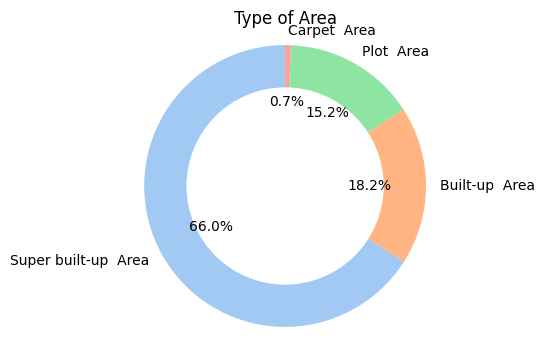

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64


In [ ]:
# donut chart for area type

#labels
area_counts = df['area_type'].value_counts()

plt.figure(figsize=(4, 4))  # Set the figure size
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
centre_circle = plt.Circle((0,0),0.70,fc='white')  # Create a white circle to make the donut
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Type of Area')  # Set the title of the plot
plt.show()  # Display the plot

print(area_counts)

## availability

In [ ]:
data = df["availability"].unique()
data

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [ ]:
# plt.figure(figsize=(12, 6))
# sns.countplot(x=data, order=data.value_counts().index, palette='pastel')
# plt.title('Distribution of Property Availability')
# plt.xlabel('Availability Status or Date')
# plt.ylabel('Count')
# plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# plt.show()

In [ ]:
data = ['Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
         '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
         '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec', '17-Aug', '19-Apr', '18-Jun', '22-Dec',
        '22-Jan', '18-Aug', '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug', '18-Sep', '17-May',
        '17-Jun', '21-May', '18-Jan', '20-Mar', '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
        'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct', '21-Jan', '17-Mar',
        '17-Apr', '22-May', '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep', '21-Aug',
        '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
         '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov', '20-Apr', '16-Jan', '14-Jul']

In [ ]:
import re

def extract_months(data):
  months = []  # Initialize an empty list to store extracted months
  # Iterate through each item in the input 'data' list
  for item in data:
    month = re.findall(r'-(\w{3})$', item)  # Extracts three-letter month abbreviation at the end of the string
    if month:
      months.append(month[0])  # Append the extracted month to the 'months' list
  return months  # Return the list of extracted months


In [ ]:
data = df["availability"].apply(extract_months)
data

0        []
1        []
2        []
3        []
4        []
         ..
13315    []
13316    []
13317    []
13318    []
13319    []
Name: availability, Length: 13320, dtype: object

## location

In [ ]:
df["location"]

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13320, dtype: object

In [ ]:
location_stats = df.groupby("location")["location"].agg("count").sort_values(ascending = False)
location_stats

location
Whitefield             540
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
Thanisandra            234
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1305, dtype: int64

In [ ]:
len(location_stats[location_stats <= 10])

1064

In [ ]:
location_less_than_10 = location_stats[location_stats <= 10]
location_less_than_10

location
Naganathapura           10
Nagadevanahalli         10
Dodsworth Layout        10
Dairy Circle            10
Nagappa Reddy Layout    10
                        ..
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1064, dtype: int64

In [ ]:
df.location = df.location.apply(lambda x: "other" if x in location_less_than_10 else x)

In [ ]:
len(df.location.unique())

243

In [ ]:
# area_counts = df['l'].value_counts()

# plt.figure(figsize=(4, 4))  # Set the figure size
# plt.pie(area_counts, labels=df.location.unique(), autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
# centre_circle = plt.Circle((0,0),0.70,fc='white')  # Create a white circle to make the donut
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
# plt.title('Type of Area')  # Set the title of the plot
# plt.show()  # Display the plot

# print(area_counts)

In [ ]:
labels = df['location'].value_counts().index.to_list()

In [ ]:
# # Create a pie chart

# sizes = location_less_than_10.value_counts()

# plt.figure(figsize=(8, 8))
# plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# # Add a title
# plt.title('Pie Chart of Categories')

# # Display the chart
# plt.show()

## imp



**We are assuming that columns : - Area_type, society, balcony, availability are not importnat for our dataset model. So, we remove them.**

In [ ]:
# creating new dataset tby removing some columns
df1 = df.drop(["area_type","society","balcony","availability"], axis = True)

In [ ]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
# checking null values
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [ ]:
df2 = df1.copy()

In [ ]:
df2.shape

(13320, 5)

## bhk

In [ ]:
# creating a new column "BHK" by using size column
df2["bhk"] = df2["size"].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) else None).astype('Int64')



In [ ]:
# drop the size column
# df2.drop(columns=["size"], inplace=True)
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


## squarefit


**Total_sqft**

In [ ]:
df3 = df2.copy()
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [ ]:
df3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
# to check the value of square fit which have anonyms value like "1133-1384"
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [ ]:
# applying above function to the dataset
df3[df3["total_sqft"].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [ ]:
df3[~df3["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,NaN,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,NaN,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,NaN,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2


In [ ]:
# calculate the average of the range of square fits
def convert_sqft_to_num(x):
  token = x.split('-')
  if len(token) == 2:
    return (float(token[0])+float(token[1]))/2
  try:
    return int(float(x))
  except:
    return None


In [ ]:
# applying the above function to the dataset
df3['total_sqft'] = df3["total_sqft"].apply(convert_sqft_to_num)

In [ ]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [ ]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

**Square fits convert into the average of their range**

## price per square

In [ ]:
df4 = df3.copy()

In [ ]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [ ]:
df4["price_per_sqft"] = df4["price"]*100000 / df4["total_sqft"]
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


# outlier


normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [ ]:
df4.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

In [ ]:
df4[df4.total_sqft/df4.bhk < 300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft


In [ ]:
df5 = df4.copy()

In [ ]:
df5["new"] = df4["total_sqft"] / df4["bhk"]
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,new
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,528.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615,650.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,480.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,507.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,600.0


In [ ]:
df4 = df4[~(df4.total_sqft/df4.bhk<300)]
df4.shape

(12514, 7)

**Using  std and mean**

In [ ]:
df4.price_per_sqft.describe()

count     12514.000000
mean       6307.381442
std        4160.781004
min         267.829813
25%        4210.762120
50%        5295.073227
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

**Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation**

In [ ]:
# creating a function to remove the outlier from location
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df4)
df6.shape


(10289, 7)

In [ ]:
df6.head(20)

In [ ]:
df6.location.unique()

In [ ]:
import matplotlib.pyplot as plt

def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]

    plt.figure(figsize=(12, 8))

    # Scatter plot for 2 BHK
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=80, alpha=0.8, edgecolor='black')

    # Scatter plot for 3 BHK
    plt.scatter(bhk3.total_sqft, bhk3.price, color='green', label='3 BHK', s=80, alpha=0.8, edgecolor='black', marker='^')

    plt.xlabel("Total Square Feet Area", fontsize=14)
    plt.ylabel("Price (Lakh Indian Rupees)", fontsize=14)
    plt.title(f"Price Distribution for 2 BHK and 3 BHK in {location}", fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(fontsize=12)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()

    plt.show()


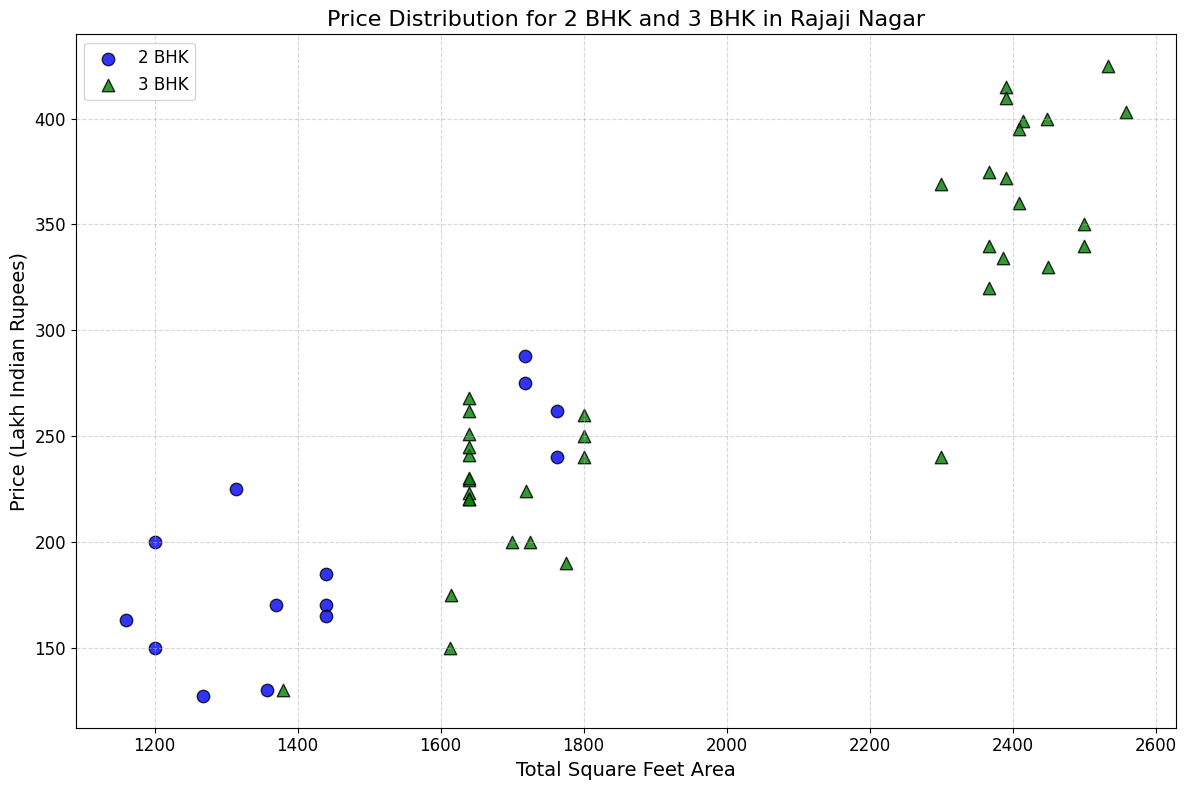

In [ ]:
plot_scatter_chart(df6,"Rajaji Nagar")

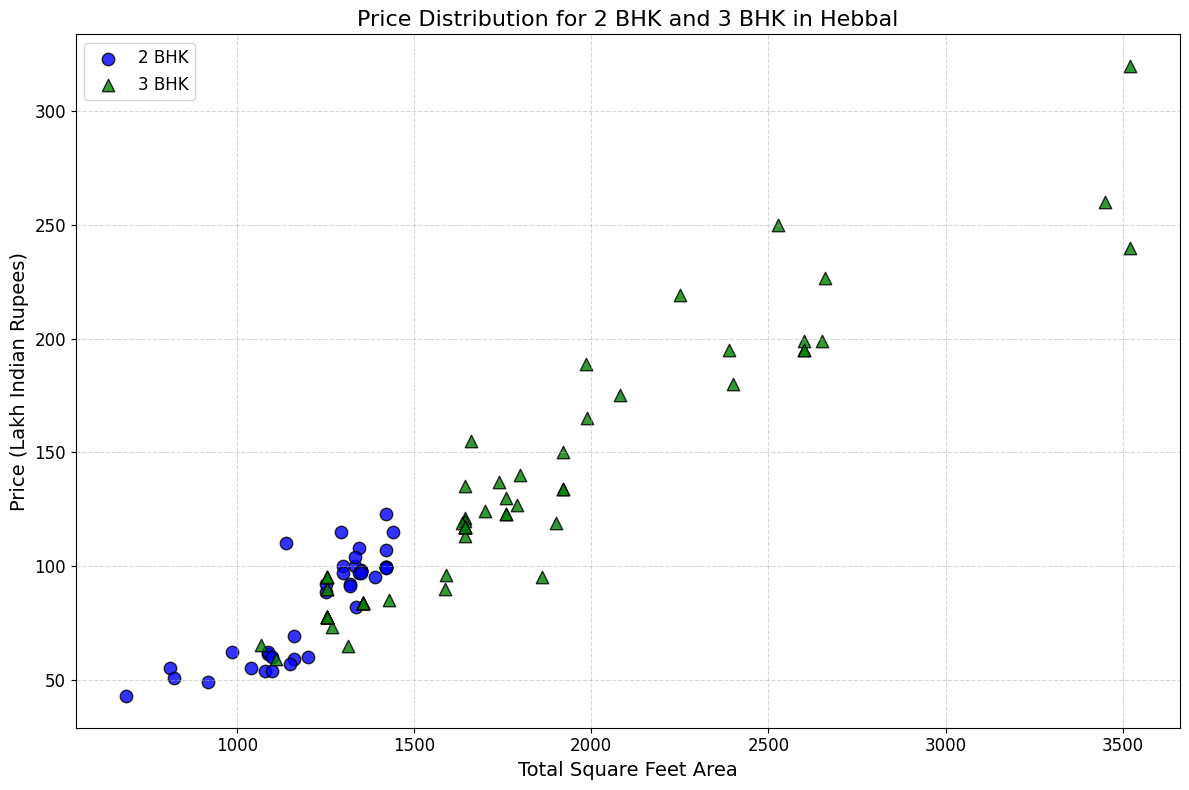

In [ ]:
plot_scatter_chart(df6,"Hebbal")

**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])  # Initialize array to store indices of rows to be excluded

    for location, location_df in df.groupby('location'):
        # For each location, group by BHK configuration and calculate statistics
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }

        # Iterate over each BHK configuration and identify outliers
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)  # Get statistics of previous BHK configuration
            if stats and stats['count'] > 5:
                # Check if stats exist for previous BHK and there are sufficient data points
                # Identify outliers based on comparison with mean of previous BHK
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)

    # Remove outliers by dropping rows with excluded indices
    return df.drop(exclude_indices, axis='index')

# Example usage
df7 = remove_bhk_outliers(df6)


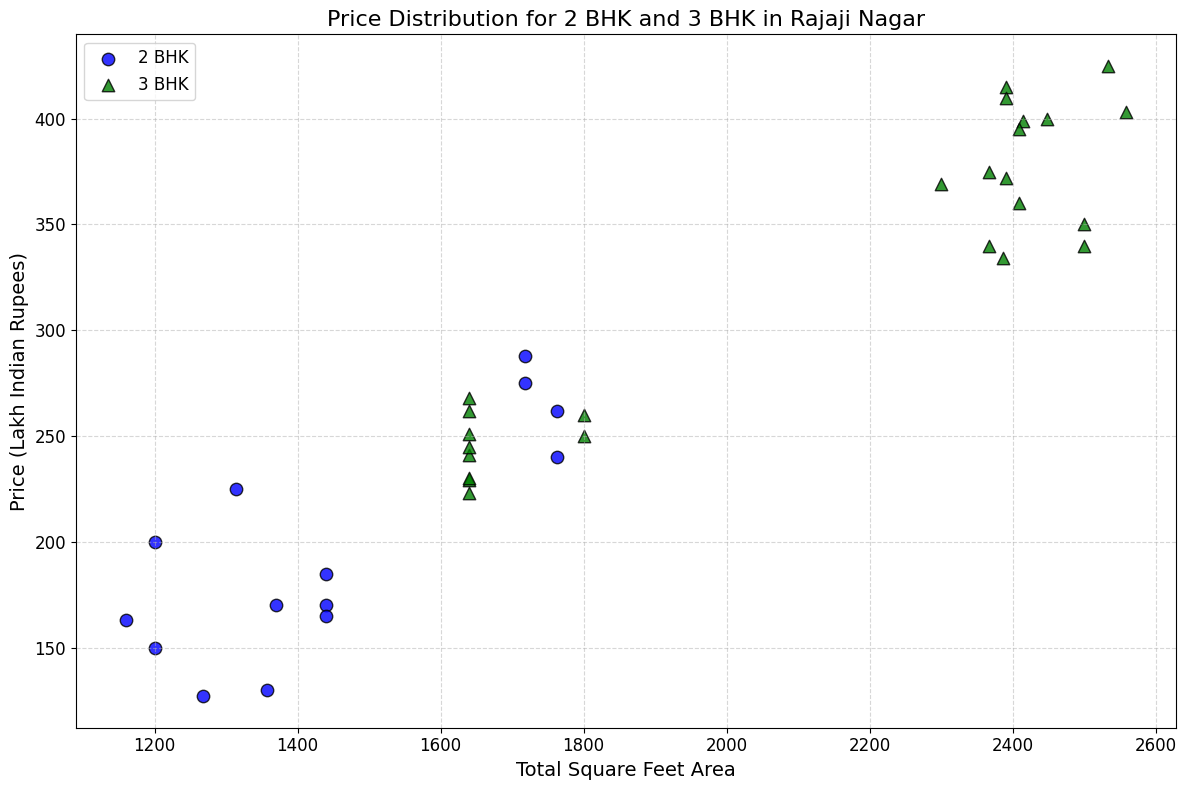

In [ ]:
plot_scatter_chart(df7,"Rajaji Nagar")

In [ ]:
plot_scatter_chart(df7,"Hebbal")

In [ ]:
df7.price_per_sqft

In [ ]:
# histogram for price per sqft

# Set the default figure size
plt.figure(figsize=(15, 7))

# Create histogram with customized appearance
plt.hist(df7.price_per_sqft, bins=30, color='skyblue', edgecolor='black', alpha=0.7, linewidth=1.5, rwidth=0.8)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Add labels and title with enhanced font styles
plt.xlabel("Price Per Square Feet", fontsize=14, fontweight='bold', color='black')
plt.ylabel("Count", fontsize=14, fontweight='bold', color='black')
plt.title("Distribution of Price Per Square Feet", fontsize=16, fontweight='bold', color='black')

# Set axis tick parameters for better readability
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Add legend if needed
# plt.legend()

# Show plot
plt.show()


# bath

In [ ]:
df7.isnull().sum()

In [ ]:
# replacing nan value with mean value
mean_value = df7['bath'].mean()
df7['bath'] = df7['bath'].fillna(mean_value)

In [ ]:
df7.isnull().sum()

In [ ]:
a = df7.bath
df7["bath"] = a.astype(int)

In [ ]:
df7.head()

In [ ]:
df7.bath.value_counts()

In [ ]:
import seaborn as sns

sns.set_style('whitegrid')
sns.barplot(x=df7.bath, y=range(1, len(df8.bath)+1), color='steelblue', alpha=0.8)

plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")
plt.title("Distribution of Bathrooms")
plt.xticks(rotation=0)

plt.show()